In [1]:
import quandl
import pandas as pd
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
from datetime import datetime, timedelta


def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## FUNCTIONS

In [2]:
def cip_dev(date, pair, forwards, df):
    "in a gbpusd example cur1 is usd..."    
    cur1 = pair[3:6]
    cur2 = pair[0:3]
    fw_mar = forwards[0]
    fw_jun = forwards[1]
    fw_sep = forwards[2]
    fw_dec = forwards[3]
    
    global r1
    global r2
    global forward
    # if date is before 15th of January
    if datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('01-15',"%m-%d"):
        maturity = str(date)[0:4]+'-03-15'
        if date in fw_mar.index:
            forward = fw_mar[fw_mar.index == date]['fw'][0]
        else:
            forward = fw_mar[fw_mar.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # if date is before 15th of February
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('02-15',"%m-%d"):
        maturity = str(date)[0:4]+'-03-15'
        if date in fw_mar.index:
            forward = fw_mar[fw_mar.index == date]['fw'][0]
        else:
            forward = fw_mar[fw_mar.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    #  March 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('03-15',"%m-%d"):
        maturity = str(date)[0:4]+'-06-15'
        if date in fw_jun.index:
            forward = fw_jun[fw_jun.index == date]['fw'][0]
        else:
            forward = fw_jun[fw_jun.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(90))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False and pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 3m ' + cur1][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    # April 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('04-15',"%m-%d"):
        maturity = str(date)[0:4]+'-06-15'
        if date in fw_jun.index:
            forward = fw_jun[fw_jun.index == date]['fw'][0]
        else:
            forward = fw_jun[fw_jun.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # May 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('05-15',"%m-%d"):
        maturity = str(date)[0:4]+'-06-15'
        if date in fw_jun.index:
            forward = fw_jun[fw_jun.index == date]['fw'][0]
        else:
            forward = fw_jun[fw_jun.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # June 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('06-15',"%m-%d"):
        maturity = str(date)[0:4]+'-09-15'
        if date in fw_sep.index:
            forward = fw_sep[fw_sep.index == date]['fw'][0]
        else:
            forward = fw_sep[fw_sep.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(90))[0:10]
        if pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 3m ' + cur1][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    #July 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('07-15',"%m-%d"):
        maturity = str(date)[0:4]+'-09-15'
        if date in fw_sep.index:
            forward = fw_sep[fw_sep.index == date]['fw'][0]
        else:
            forward = fw_sep[fw_sep.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # August 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('08-15',"%m-%d"):
        maturity = str(date)[0:4]+'-09-15'
        if date in fw_sep.index:
            forward = fw_sep[fw_sep.index == date]['fw'][0]
        else:
            forward = fw_sep[fw_sep.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # September 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('09-15',"%m-%d"):
        maturity = str(date)[0:4]+'-12-15'
        if date in fw_dec.index:
            forward = fw_dec[fw_dec.index == date]['fw'][0]
        else:
            forward = fw_dec[fw_dec.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(90))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False and pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 3m '+cur1][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    # October 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('10-15',"%m-%d"):
        maturity = str(date)[0:4]+'-12-15'
        if date in fw_dec.index:
            forward = fw_dec[fw_dec.index == date]['fw'][0]
        else:
            forward = fw_dec[fw_dec.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(60))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(2/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # November 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('11-15',"%m-%d"):
        maturity = str(date)[0:4]+'-12-15'
        if date in fw_dec.index:
            forward = fw_dec[fw_dec.index == date]['fw'][0]
        else:
            forward = fw_dec[fw_dec.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(30))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(1/12))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = ((1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(str(date)[0:10],maturity)/365))
            r2 = ((1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(str(date)[0:10],maturity)/365))
    # December 15th
    elif datetime.strptime(str(date)[5:10],"%m-%d") < datetime.strptime('12-15',"%m-%d"):
        maturity = str(int(str(date)[0:4])+1)+'-03-15'
        if date in fw_dec.index:
            forward = fw_mar[fw_mar.index == date]['fw'][0]
        else:
            forward = fw_mar[fw_mar.index == (date+timedelta(1))]['fw'][0]
        first_term = str(date+timedelta(90))[0:10]
        if pd.isnull(df[df.index == date]['libor 1w '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 1w '+cur2])[0] == False and pd.isnull(df[df.index == date]['libor 3m '+cur1])[0] == False and pd.isnull(df[df.index == date]['libor 3m ' + cur2])[0] == False:
            r1 = ((1 + df[df.index == date ]['libor 3m '+cur1][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur1][0]/100)**(days_between(first_term,maturity)/365)
            r2 = ((1 + df[df.index == date ]['libor 3m ' + cur2][0]/100)**(1/4))*(1 + df[df.index == date ]['libor 1w '+cur2][0]/100)**(days_between(first_term,maturity)/365)
        else:
            r1 = (1 + df[df.index == date ]['libor 1m '+cur1][0]/100)**(days_between(maturity,str(date)[0:10])/365)
            r2 = (1 + df[df.index == date ]['libor 1m '+cur2][0]/100)**(days_between(maturity,str(date)[0:10])/365)
    
    spot = df[df.index == date][pair][0]
    cip_deviation = (r1 - r2*forward/spot)
    df.set_value(date, 'fw_'+pair, forward)
    df.set_value(date, 'cip_dev_'+ pair, cip_deviation)
    df.set_value(date, 'r_'+cur1, (r1-1))
    df.set_value(date, 'r_'+cur2, (r2-1))
    #{'fw_'+pair : forward, 'cip_dev_'+pair : cip_deviation, 'r_'+cur1 : (r1-1), 'r_'+cur2 : (r2-1)}
             
    return None 


In [3]:
def last_bench(pair,df):
    "pair must be a string, df is the pandasdf where data for that pair are stored"
    # delta cip dev
    for i in range(1,len(df.index)):
        df.set_value(df.index[i],'delta_cip_dev_'+pair,
                     df.ix[df.index[i],'cip_dev_'+pair]-df.ix[df.index[i-1],'cip_dev_'+pair])

    
    # spot change FROM PREVIOUS DAY
    for i in range(1,len(df.index)):
        df.set_value(df.index[i],pair+'_prevDayChange',
                     (df.ix[df.index[i],pair]-df.ix[df.index[i-1],pair])/df.ix[df.index[i-1],pair])
    # spot change THE FOLLOWING DAY -> it will be my Y
    for i in range(0,len(df.index)-1):
        df.set_value(df.index[i],pair+'_nextDayChange',
                     (df.ix[df.index[i+1],pair]-df.ix[df.index[i],pair])/df.ix[df.index[i],pair])

    return None

### ML FUNCTIONS

In [53]:
from sklearn import tree
from sklearn import metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn import svm
from sklearn import preprocessing

def mse(yval_pred, yval):
  val_mse = metrics.mean_squared_error(yval_pred, yval)
  return(val_mse)

def DecisionTreeReg(pair, df):
    np.random.seed(0) #important
    
    df=df.dropna()
    
    indicesTrain = np.where(df.index <= '2012')[0]
    indicesVal = np.where((df.index > '2013') & (df.index < '2015'))[0]
    indicesTest = np.where(df.index >= '2015')[0]
    indicesTrainFin = np.where(df.index < '2015')[0]

    partitions = [(indicesTrain, indicesVal)]

    param_grid = {'splitter' : ('best', 'random'),
                 'max_features' : ('log2', 'sqrt', 'auto'),
                 'max_depth' : range(1,20,1),
                 'min_samples_split' : range(2,10,1),
                 'min_samples_leaf' : range(1,20,1)
                 }

    grid_clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                       param_grid = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = partitions,
                       verbose = 1, n_jobs = -1)
    
    # naturally pair_change column is omitted
    grid_clf.fit(df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix(), df.ix[:,pair+'_nextDayChange'])

    print "Best hyper-parameters are: {} they give a MSE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)

    clf = tree.DecisionTreeRegressor(max_features= grid_clf.best_params_['max_features'],
                                     min_samples_split=grid_clf.best_params_['min_samples_split'], 
                                     splitter=grid_clf.best_params_['splitter'],
                                     max_depth=grid_clf.best_params_['max_depth'], 
                                     min_samples_leaf=grid_clf.best_params_['min_samples_leaf'])

    x = df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix()
    y = df[pair+'_nextDayChange'].as_matrix() # slipped next day spot

    xTrain = x[indicesTrainFin]
    yTrain = y[indicesTrainFin]
    xTest = x[indicesTest]
    yTest = y[indicesTest]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final regressor on test is %s" %(mse(yPred, yTest))
    
    global trainedClf
    trainedClf= clf
    global DTpredictions
    DTpredictions = pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextDayChange']), pd.DataFrame(yPred, columns=['RFpred_'+pair+'_nextDayChange'])], axis=1)

############################################################################################################
    
def RandomForestReg(pair, df):
    
    df=df.dropna()
    
    np.random.seed(0)

    indicesTrain = np.where(df.index <= '2012')[0]
    indicesVal = np.where((df.index > '2013') & (df.index < '2015'))[0]
    indicesTest = np.where(df.index >= '2015')[0]
    indicesTrainFin = np.where(df.index < '2015')[0]
    
    partitions = [(indicesTrain, indicesVal)]

    param_dist = {'n_estimators' : sp_randint(25,125),
                  'max_features': ('log2', 'sqrt', 'auto'),
                  'max_depth': range(1,100,5),
                  'min_samples_split': range(2,20,1),
                  'warm_start' : (True, False),
                  'min_samples_leaf': range(1,20,1)}

    n_iter_search = 15000 #Number of parameter settings that are sampled. 
    #n_iter trades off runtime vs quality of the solution.

    rs_rf = RandomizedSearchCV(RandomForestRegressor(), 
                                       param_distributions=param_dist,
                                       scoring='neg_mean_squared_error',
                                       cv=partitions ,
                                       n_jobs=-1, verbose=1,
                                       n_iter=n_iter_search)

    rs_rf.fit(df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix(), df.ix[:, pair+'_nextDayChange'])

    print "Best hyper-parameters are: {} they give a MSE of: {}".format(rs_rf.best_params_, -rs_rf.best_score_)
    
    clf = RandomForestRegressor(n_estimators=rs_rf.best_params_['n_estimators'],
                                max_features=rs_rf.best_params_['max_features'],
                                max_depth=rs_rf.best_params_['max_depth'],
                                min_samples_split=rs_rf.best_params_['min_samples_split'],
                                min_samples_leaf=rs_rf.best_params_['min_samples_leaf'],
                                warm_start=rs_rf.best_params_['warm_start'])

    x = df.ix[:, df.columns != pair+'_nextDayChange'].as_matrix()
    y = df[pair+'_nextDayChange'].as_matrix()

    xTrain = x[indicesTrainFin]
    yTrain = y[indicesTrainFin]
    xTest = x[indicesTest]
    yTest = y[indicesTest]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final regressor on test is %s" %(mse(yPred, yTest))
    
    global trainedClf
    trainedClf= clf
    global RFpredictions
    RFpredictions = pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextDayChange']), pd.DataFrame(yPred, columns=['RFpred_'+pair+'_nextDayChange'])], axis=1)

#################################################################################################################

def SVMregressor(pair, df):
    np.random.seed(0) #important
    
    df=df.dropna()
    
    indicesTrain = np.where(df.index <= '2012')[0]
    indicesVal = np.where((df.index > '2013') & (df.index < '2015'))[0]
    indicesTest = np.where(df.index >= '2015')[0]
    indicesTrainFin = np.where(df.index < '2015')[0]

    partitions = [(indicesTrain, indicesVal)]
    
    c = [1,10,100,1000]
    yy = np.logspace(-3,3, num=5) #gamma in range (10e-3 , 10e3)
    
    param_grid = {'C': c,'gamma': yy}

    grid_clf = GridSearchCV(svm.SVR(kernel='rbf'), 
                       param_grid = param_grid,
                       scoring = 'neg_mean_squared_error',
                       cv = partitions,
                       verbose = 1, n_jobs = -1)
    
    # naturally pair_change column is omitted
    grid_clf.fit(preprocessing.scale(df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix(),axis=1),
                 df.ix[:,pair+'_nextDayChange'])

    print "Best hyper-parameters are: {} they give a MSE of: {}".format(grid_clf.best_params_, -grid_clf.best_score_)

    clf = svm.SVR(kernel='rbf', C = grid_clf.best_params_['C'], gamma= grid_clf.best_params_['gamma'])

    x = preprocessing.scale(df.ix[:, df.columns != pair+'_nextDaychange'].as_matrix(),axis=1)
    y = df[pair+'_nextDayChange'].as_matrix() # slipped next day spot

    xTrain = x[indicesTrainFin]
    yTrain = y[indicesTrainFin]
    xTest = x[indicesTest]
    yTest = y[indicesTest]

    clf.fit(xTrain,yTrain)

    yPred = clf.predict(xTest)

    print "\nMSE for final regressor on test is %s" %(mse(yPred, yTest))
    
    global trainedSVR
    trainedSVR = clf
    global SVRpredictions
    SVRpredictions = pd.concat([pd.DataFrame(yTest, columns=[pair+'_nextDayChange']), pd.DataFrame(yPred, columns=['RFpred_'+pair+'_nextDayChange'])], axis=1)


# DEFINE A CLASS

In [54]:
class CurrencyPair:
    
    def __init__(self, pair):
        self.pair = pair
        
    
    def getQuotes(self):
        fw_mar=pd.read_csv('/home/gio/findata/fw/fw_'+self.pair+'_mar',index_col=0, parse_dates=True)
        fw_jun=pd.read_csv('/home/gio/findata/fw/fw_'+self.pair+'_jun',index_col=0, parse_dates=True)
        fw_sep=pd.read_csv('/home/gio/findata/fw/fw_'+self.pair+'_sep',index_col=0, parse_dates=True)
        fw_dec=pd.read_csv('/home/gio/findata/fw/fw_'+self.pair+'_dec',index_col=0, parse_dates=True)
        
        if self.pair == 'gbpusd':
            string = "FED/RXI_US_N_B_UK"
        elif self.pair == 'usdjpy':
            string = "FED/RXI_N_B_JA"
        elif self.pair == 'eurusd':
            string = "FED/RXI_US_N_B_EU"
        spot = quandl.get(string, authtoken="9jpLoG3FHVZqzxGaShTM")
        spot = spot.rename(columns={'Value':self.pair})
        
        libor1m_cur2 = pd.read_csv('/home/gio/findata/libor/'+self.pair[0:3].upper()+'1MTD156N.csv', header=1, index_col=0, names=['libor 1m '+self.pair[0:3]], na_values=['.'], parse_dates=True)
        libor3m_cur2 = pd.read_csv('/home/gio/findata/libor/'+self.pair[0:3].upper()+'3MTD156N.csv', header=1, index_col=0, names=['libor 3m '+self.pair[0:3]], na_values=['.'], parse_dates=True)
        libor1w_cur2 = pd.read_csv('/home/gio/findata/libor/'+self.pair[0:3].upper()+'1WKD156N.csv', header=1, index_col=0, names=['libor 1w '+self.pair[0:3]], na_values=['.'], parse_dates=True)
        
        libor1m_cur1 = pd.read_csv('/home/gio/findata/libor/'+self.pair[3:6].upper()+'1MTD156N.csv', header=1, index_col=0, names=['libor 1m '+self.pair[3:6]], na_values=['.'], parse_dates=True)
        libor3m_cur1 = pd.read_csv('/home/gio/findata/libor/'+self.pair[3:6].upper()+'3MTD156N.csv', header=1, index_col=0, names=['libor 3m '+self.pair[3:6]], na_values=['.'], parse_dates=True)
        libor1w_cur1 = pd.read_csv('/home/gio/findata/libor/'+self.pair[3:6].upper()+'1WKD156N.csv', header=1, index_col=0, names=['libor 1w '+self.pair[3:6]], na_values=['.'], parse_dates=True)
        
        self.df = spot.join([libor1m_cur2, libor1m_cur1,
                         libor3m_cur2, libor3m_cur1,
                         libor1w_cur2, libor1w_cur1],how='outer')
        self.df = self.df.ffill() # fill NA using the preceeding value
        self.df = self.df.dropna(subset=['libor 1m '+self.pair[0:3],'libor 1m '+self.pair[3:6]]) 
        
        self.forwards = [fw_mar,fw_jun,fw_sep,fw_dec]
    
    def apply_cip_dev(self):
        
        for i in self.df.index:
            try:
                cip_dev(i, self.pair, self.forwards, self.df)
            except IndexError, e:
                #print 'IndexError @ date:',i
                continue
            except ValueError, v:
                #print('ValueError %s @ date: %s') %(v,i)
                continue
    
    
    def apply_last_bench(self):
        
        self.df = self.df.dropna(subset=['cip_dev_'+self.pair])
        last_bench(self.pair,self.df)
        
    ##################
    #Machine Learning#
    ##################
    
    def apply_DecisionTreeReg(self):
        "returns a 2cols df: real and predicted ys"
        DecisionTreeReg(self.pair, self.df)
        self.predictions = DTpredictions
        self.clf = trainedClf
    
    def apply_RandomForestReg(self):
        "returns a 2cols df: real and predicted ys"
        RandomForestReg(self.pair, self.df)
        self.predictions = RFpredictions
        self.clf = trainedClf
    
    def apply_SVMregressor(self):
        "returns a 2cols df: real and predicted ys"
        SVMregressor(self.pair, self.df)
        self.predictions = SVRpredictions
        self.clf = trainedSVR

            
        


In [ ]:
eurusd=CurrencyPair('eurusd')
usdjpy=CurrencyPair('usdjpy')
#chfusd=CurrencyPair('chfusd')
#audusd=CurrencyPair('audusd')

eurusd.getQuotes()
usdjpy.getQuotes()
#chfusd.getQuotes()
#audusd.getQuotes()

eurusd.apply_cip_dev()
usdjpy.apply_cip_dev()

eurusd.apply_last_bench()
usdjpy.apply_last_bench()

In [55]:
gbpusd=CurrencyPair('gbpusd')
gbpusd.getQuotes()
len(gbpusd.df)

8191

In [56]:
gbpusd.apply_cip_dev()
gbpusd.apply_last_bench()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [57]:
gbpusd.df[3500:3510]

,gbpusd,libor 1m gbp,libor 1m usd,libor 3m gbp,libor 3m usd,libor 1w gbp,libor 1w usd,fw_gbpusd,cip_dev_gbpusd,r_usd,r_gbp,delta_cip_dev_gbpusd,gbpusd_prevDayChange,gbpusd_nextDayChange
2000-07-14,1.4990,6.06219,6.6275,6.18344,6.73000,5.92750,6.60500,1.4998,-0.000487,0.011284,0.011231,0.002564,0.000000,-0.004670
2000-07-17,1.4920,6.05375,6.6300,6.18000,6.74000,5.89125,6.59750,1.4962,-0.001834,0.010657,0.009649,-0.001347,-0.004670,0.001676
2000-07-18,1.4945,6.06388,6.6300,6.18219,6.74000,6.06000,6.59375,1.4992,-0.002324,0.010477,0.009627,-0.000490,0.001676,-0.000201
2000-07-19,1.4942,6.06844,6.6300,6.18000,6.74000,6.12750,6.59125,1.4984,-0.002055,0.010299,0.009517,0.000269,-0.000201,0.010173
2000-07-20,1.5094,6.08922,6.6300,6.19250,6.74000,6.15500,6.58875,1.5144,-0.002611,0.010120,0.009388,-0.000556,0.010173,0.004836
2000-07-21,1.5167,6.09672,6.6200,6.19344,6.71750,6.18313,6.60125,1.5204,-0.001766,0.009944,0.009248,0.000846,0.004836,-0.001780
2000-07-24,1.5140,6.06969,6.6200,6.19125,6.71375,5.88625,6.60375,1.5168,-0.001001,0.009415,0.008551,0.000765,-0.001780,0.003303
2000-07-25,1.5190,6.06313,6.6200,6.19250,6.71500,5.88063,6.60625,1.5184,0.001254,0.009240,0.008384,0.002255,0.003303,-0.002370
2000-07-26,1.5154,6.07688,6.6200,6.19000,6.71250,6.05844,6.60250,1.5166,-0.000072,0.009061,0.008335,-0.001326,-0.002370,-0.002508
2000-07-27,1.5116,6.07750,6.6200,6.19375,6.71250,6.06063,6.60500,1.5148,-0.001423,0.008886,0.008174,-0.001350,-0.002508,-0.006020


In [26]:
gbpusd.apply_SVMregressor()

Fitting 1 folds for each of 20 candidates, totalling 20 fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:146: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


Best hyper-parameters are: {'C': 1, 'gamma': 0.001} they give a MSE of: 1.83073657978e-05

MSE for final classifier on test is 4.98408478546e-05


In [27]:
gbpusd.predictions.head()

,gbpusd_nextDayChange,RFpred_gbpusd_nextDayChange
0,-0.013930,-0.001551
1,-0.008268,-0.001551
2,-0.003939,-0.001551
3,-0.006656,-0.001551
4,0.002985,-0.001551


In [28]:
gbpusd.apply_DecisionTreeReg()

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
[Parallel(n_jobs=-1)]: Done 1004 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 6104 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 11901 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:  1.5min finished


Best hyper-parameters are: {'max_features': 'auto', 'min_samples_split': 5, 'splitter': 'random', 'max_depth': 14, 'min_samples_leaf': 5} they give a MSE of: 3.689985121e-08

MSE for final classifier on test is 5.41558056905e-06


In [29]:
gbpusd.predictions.head()

,gbpusd_nextDayChange,RFpred_gbpusd_nextDayChange
0,-0.013930,-0.012491
1,-0.008268,-0.008058
2,-0.003939,-0.003694
3,-0.006656,-0.006507
4,0.002985,0.002906


In [58]:
gbpusd.apply_RandomForestReg()

Fitting 1 folds for each of 15000 candidates, totalling 15000 fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:100: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 719

Best hyper-parameters are: {'warm_start': False, 'min_samples_leaf': 1, 'n_estimators': 59, 'max_features': 'auto', 'min_samples_split': 7, 'max_depth': 21} they give a MSE of: 3.39102499522e-09

MSE for final regressor on test is 5.17220306302e-05


In [59]:
gbpusd.predictions.head()

,gbpusd_nextDayChange,RFpred_gbpusd_nextDayChange
0,-0.013930,-0.011919
1,-0.008268,-0.001373
2,-0.003939,0.000654
3,-0.006656,-0.000590
4,0.002985,0.002560


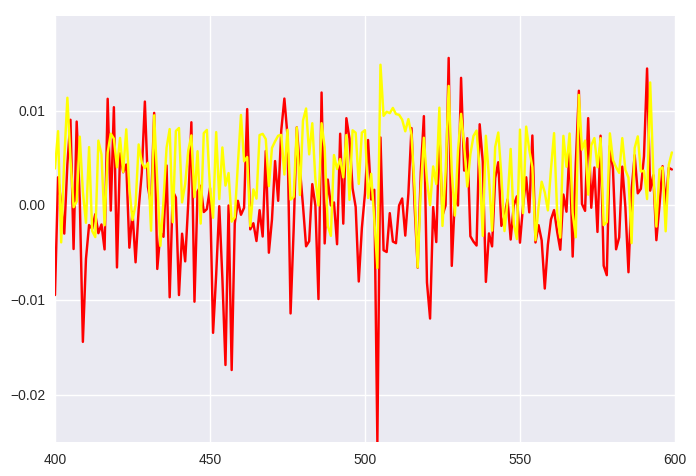

In [60]:
import matplotlib.pyplot as plt

plt.figure(dpi=80,edgecolor='w',facecolor='w')
plt.plot(gbpusd.predictions[400:600].index, gbpusd.predictions[400:600]['gbpusd_nextDayChange'],color='red')
plt.plot(gbpusd.predictions[400:600].index, gbpusd.predictions[400:600]['RFpred_gbpusd_nextDayChange'],color='yellow')
plt.show()

In [17]:
eurusd.apply_RandomForestReg()

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6472 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 14230 tasks      | elapsed:   56.4s


Best hyper-parameters are: {'max_features': 'auto', 'min_samples_split': 9, 'splitter': 'random', 'max_depth': 18, 'min_samples_leaf': 2} they give a MSE of: 3.51319892592e-08

MSE for final classifier on test is 7.25389135826e-08


[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:  1.2min finished


In [19]:
eurusd.predictions.tail()

,eurusd_nextDayChange,RFpred_eurusd_nextDayChange
605,-0.006184,-0.006339
606,-0.004850,-0.004966
607,-0.000184,-0.000515
608,-0.000368,-0.000515
609,0.005244,0.004960


In [20]:
usdjpy.apply_RandomForestReg()

Fitting 1 folds for each of 17328 candidates, totalling 17328 fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 12525 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 17328 out of 17328 | elapsed:  1.2min finished


Best hyper-parameters are: {'max_features': 'auto', 'min_samples_split': 4, 'splitter': 'random', 'max_depth': 12, 'min_samples_leaf': 1} they give a MSE of: 4.36886166643e-08

MSE for final classifier on test is 1.83437838695e-07


In [21]:
usdjpy.predictions.tail()

,usdjpy_nextDayChange,RFpred_usdjpy_nextDayChange
605,0.001865,0.001955
606,0.011964,0.011930
607,-0.001489,-0.000596
608,-0.002193,-0.002116
609,-0.004131,-0.004179
